In [73]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [74]:
import os


In [75]:
IMAGE_SIZE = [224, 224]

train_path = os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train')
valid_path=  os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Test')


In [76]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [77]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [78]:
for layer in resnet.layers:
    layer.trainable = False

In [81]:
folders = glob('C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train\\*')

In [82]:
folders

['C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train\\audi',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train\\lamborghini',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train\\mercedes']

In [83]:
x = Flatten()(resnet.output)

In [84]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [85]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [86]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [87]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [88]:
training_set = train_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [91]:
test_set=test_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\Datasets\\Test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Found 58 images belonging to 3 classes.


In [94]:
r=model.fit_generator(
training_set,
validation_data=test_set,
epochs=50,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

C:\Users\KUMAR HIREMATH\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 12s 7s/step - loss: 3.0972 - accuracy: 0.3542 - val_loss: 22.0703 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 9s 7s/step - loss: 14.8016 - accuracy: 0.3125 - val_loss: 7.4246 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 10s 7s/step - loss: 4.5681 - accuracy: 0.4271 - val_loss: 2.9783 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 10s 7s/step - loss: 6.5329 - accuracy: 0.4167 - val_loss: 5.4880 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 10s 7s/step - loss: 8.2561 - accuracy: 0.3125 - val_loss: 4.6565 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 10s 7s/step - loss: 5.7816 - accuracy: 0.3854 - val_loss: 1.4505 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 10s 7s/step - loss: 2.1275 - accuracy: 0.3229 - val_loss: 4.8258 - val_accuracy: 0.1552
Epoch 8/50
2/2 [=================

In [95]:
r.history

{'loss': [3.890909194946289,
  14.139873504638672,
  4.903424263000488,
  6.983518123626709,
  7.94550895690918,
  5.563566207885742,
  1.9969245195388794,
  3.8372929096221924,
  2.926361322402954,
  1.4414843320846558,
  1.6341371536254883,
  1.6142041683197021,
  1.1730623245239258,
  1.4640522003173828,
  0.8738358616828918,
  1.1515612602233887,
  0.8198335766792297,
  0.7530255913734436,
  0.7273833751678467,
  0.48632553219795227,
  0.6306883692741394,
  0.35919666290283203,
  0.6680784225463867,
  0.35614442825317383,
  0.446222722530365,
  0.39229685068130493,
  0.46681177616119385,
  0.49412792921066284,
  0.33798080682754517,
  0.4701839089393616,
  0.32473668456077576,
  0.44797858595848083,
  0.27753984928131104,
  0.3357689678668976,
  0.29351139068603516,
  0.3218109607696533,
  0.2607415020465851,
  0.2821892499923706,
  0.28253960609436035,
  0.25612106919288635,
  0.2902340888977051,
  0.23120422661304474,
  0.24790190160274506,
  0.2328568994998932,
  0.2292239964008

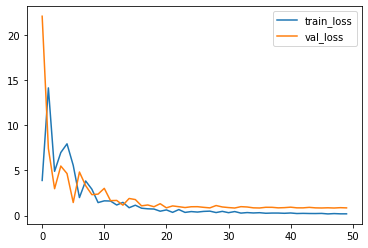

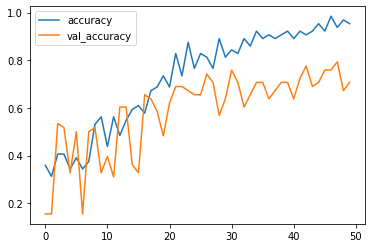

In [99]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [100]:
y_pred=model.predict(test_set)

In [101]:
y_pred

array([[3.6336906e-02, 8.0808771e-01, 1.5557539e-01],
       [1.8717490e-01, 2.0208289e-01, 6.1074221e-01],
       [3.9904661e-02, 2.9381230e-01, 6.6628295e-01],
       [5.9067186e-02, 4.3207472e-03, 9.3661213e-01],
       [6.7431337e-01, 1.6409216e-02, 3.0927745e-01],
       [1.4322262e-02, 9.8459506e-01, 1.0826925e-03],
       [6.2624276e-02, 4.0821406e-01, 5.2916169e-01],
       [4.5670819e-02, 6.9402164e-01, 2.6030752e-01],
       [7.4272025e-01, 1.8498139e-01, 7.2298340e-02],
       [2.7143192e-03, 9.8800510e-01, 9.2805456e-03],
       [3.3100769e-01, 3.7729800e-01, 2.9169431e-01],
       [7.6396595e-04, 9.8101729e-01, 1.8218707e-02],
       [2.6920186e-02, 9.0473640e-01, 6.8343416e-02],
       [9.1595012e-01, 3.7540879e-02, 4.6509083e-02],
       [2.2642897e-02, 1.7937101e-01, 7.9798603e-01],
       [3.2063761e-01, 3.0737793e-01, 3.7198445e-01],
       [1.0931001e-01, 2.0551987e-02, 8.7013799e-01],
       [6.6030383e-02, 7.6746511e-01, 1.6650455e-01],
       [5.8700759e-02, 5.005

In [102]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [103]:
y_pred

array([1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1,
       0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1], dtype=int64)